
# <span style="color:rgb(213,80,0)">Exercise 6.4.</span>

Transformed data and F test. This file creates Figures A.19 and A.20

## Beginning of code

Balance sheets data


In [1]:
XX=load('BalanceSheets.txt');
% Define X and y
y=XX(:,6);
X=XX(:,1:5);
n=length(y);
prin=0;

## Transoform the data using lambda_P=0.5 and lambda_N=1.5

In [2]:
y0515=normYJpn(y, [], [0.5, 1.5], 'inverse',false, 'Jacobian', false);

Y=[y y0515 ];

% Initialize matrix which will contain the unbiased F test
init=1000;
FtestUnbiased=[(init:n)' zeros(n-init+1,1)];

for j=1:size(Y,2)

[outINI]=LXS(Y(:,j),X,'nsamp',1000);
outEDA=FSReda(Y(:,j),X,outINI.bs,'init',init);

% Store biased F test in the search
BB=outEDA.BB;
for mm=init:n
    % Indexes of the units forming subset at step mm
    bsb=BB(:,mm-init+1);
    bsb=bsb(~isnan(bsb));
    Xb=X(bsb,:);
    yb=Y(bsb,j);
    % Compute and store F test based on Xb and yb
    regs=regstats(yb,Xb,"linear","fstat");
    FtestUnbiased(mm-init+1,j+1)=regs.fstat.f;
end
end

Total estimated time to complete LMS:  0.13 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
Total estimated time to complete LMS:  0.06 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400

In [3]:

% Correct the F test
Sco=FtestUnbiased;
mm=Sco(:,1);
a=norminv(0.5*(1+mm/n));
corr=1-2*(n./mm).*a.*normpdf(a);
corr(end)=1;
Sco1=Sco;
Sco1(:,2:3)=Sco1(:,2:3).*corr;

out=struct;
out.Tdel=Sco1;
out.y=y;
out.X=X;
nameX=["\lambda_P=1 \lambda_N=1" "\lambda_P=0.5 \lambda_N=1.5"];
out.la=nameX;
out.class='FSRaddt';

## Create Figure A.19

In [4]:
fanplotFS(out,"ylimy",[200 520])

ans =
     []


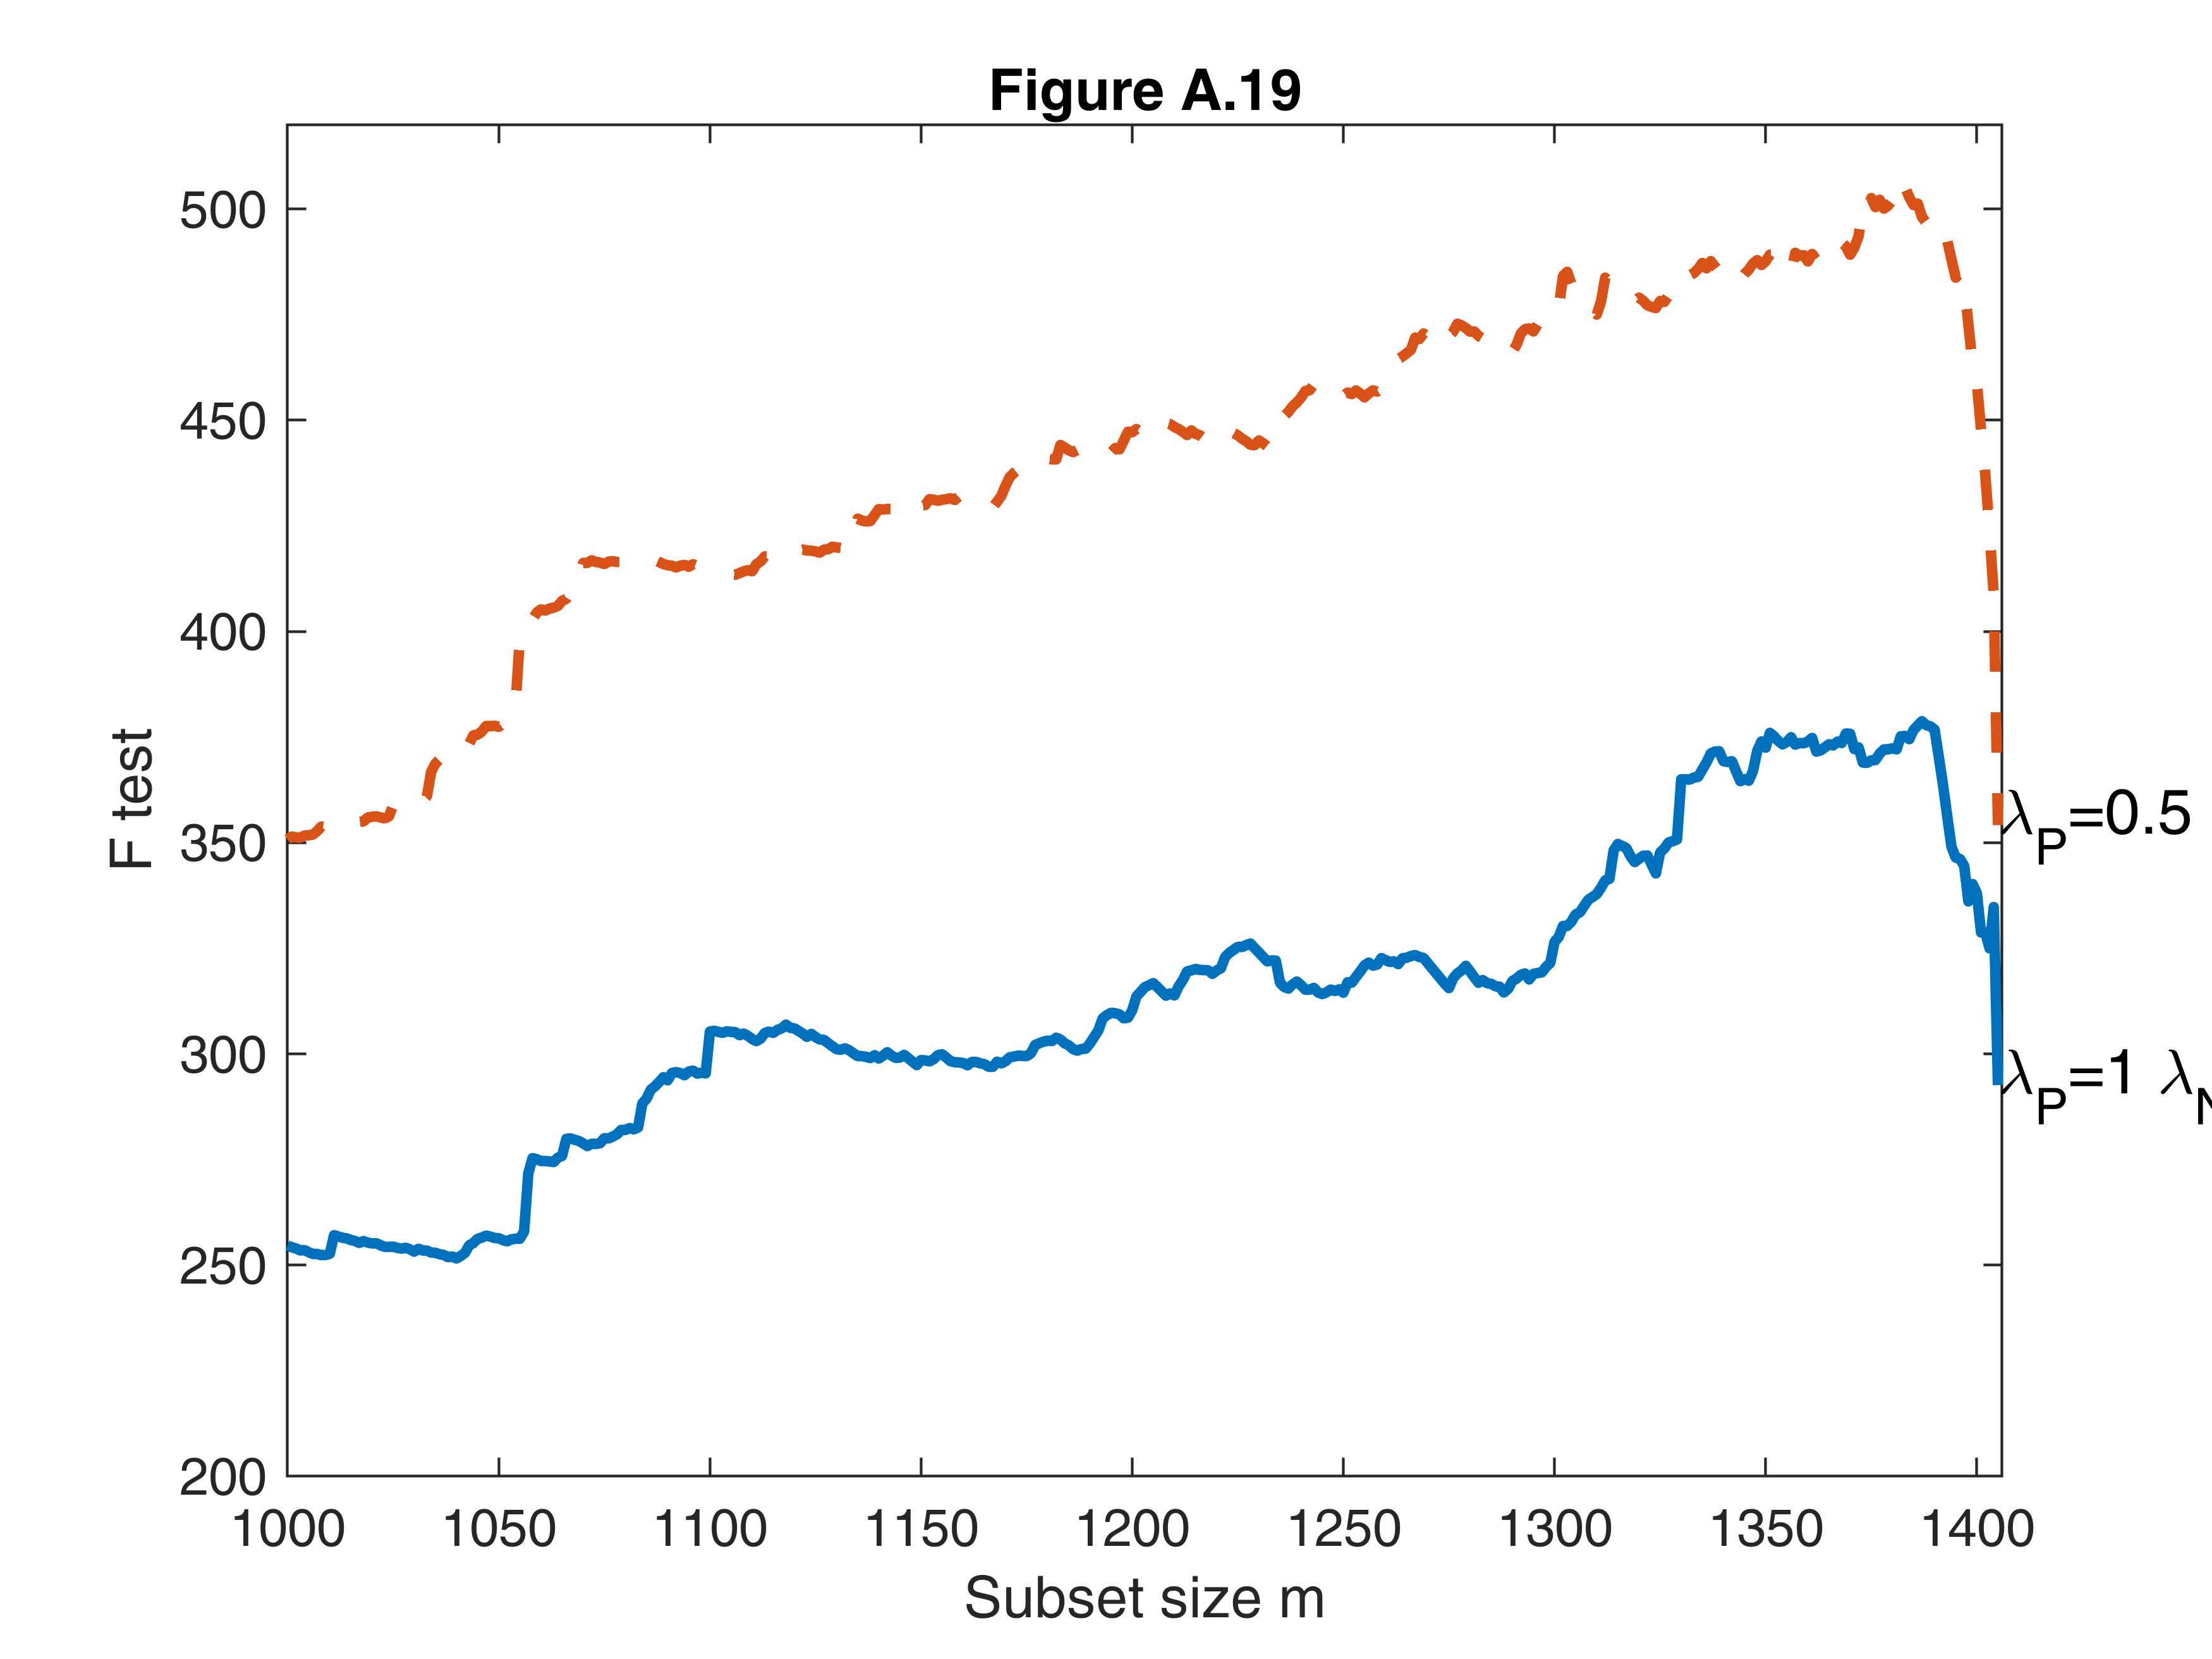

In [5]:
title('')
ylabel('F test')
if prin==1
    % print to postscript
    print -depsc BSmonitorFtest.eps;
end

title('Figure A.19')
set(gcf,"Name",'Figure A.19')

## Prepare the input for Figure A.20

Outlier detection in the transformed scale laP=0.5 and laN=1.5


In [6]:
outf=FSR(Y(:,2),X,'plots',0);

Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=1220 because
rmin(1220,1405)>99.99% and rmin(1219,1405)>99.99% and rmin(1221,1405)>99.99%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=1219
Superimposition stopped because r_{min}(1227,1370)>99.9% envelope
Subsample of 1369 units is not homogeneous because the curve was above 99.99% and later it was below 1%
----------------------------------------
Probably there are two overlapping groups
Using the criterion of the maximum, the group of homogenous obs. is= 1363
----------------------------
Final output
Number of units declared as outliers=42
Summary of the exceedances
           1          99         999        9999       99999
          11       

## Create Figure A.20


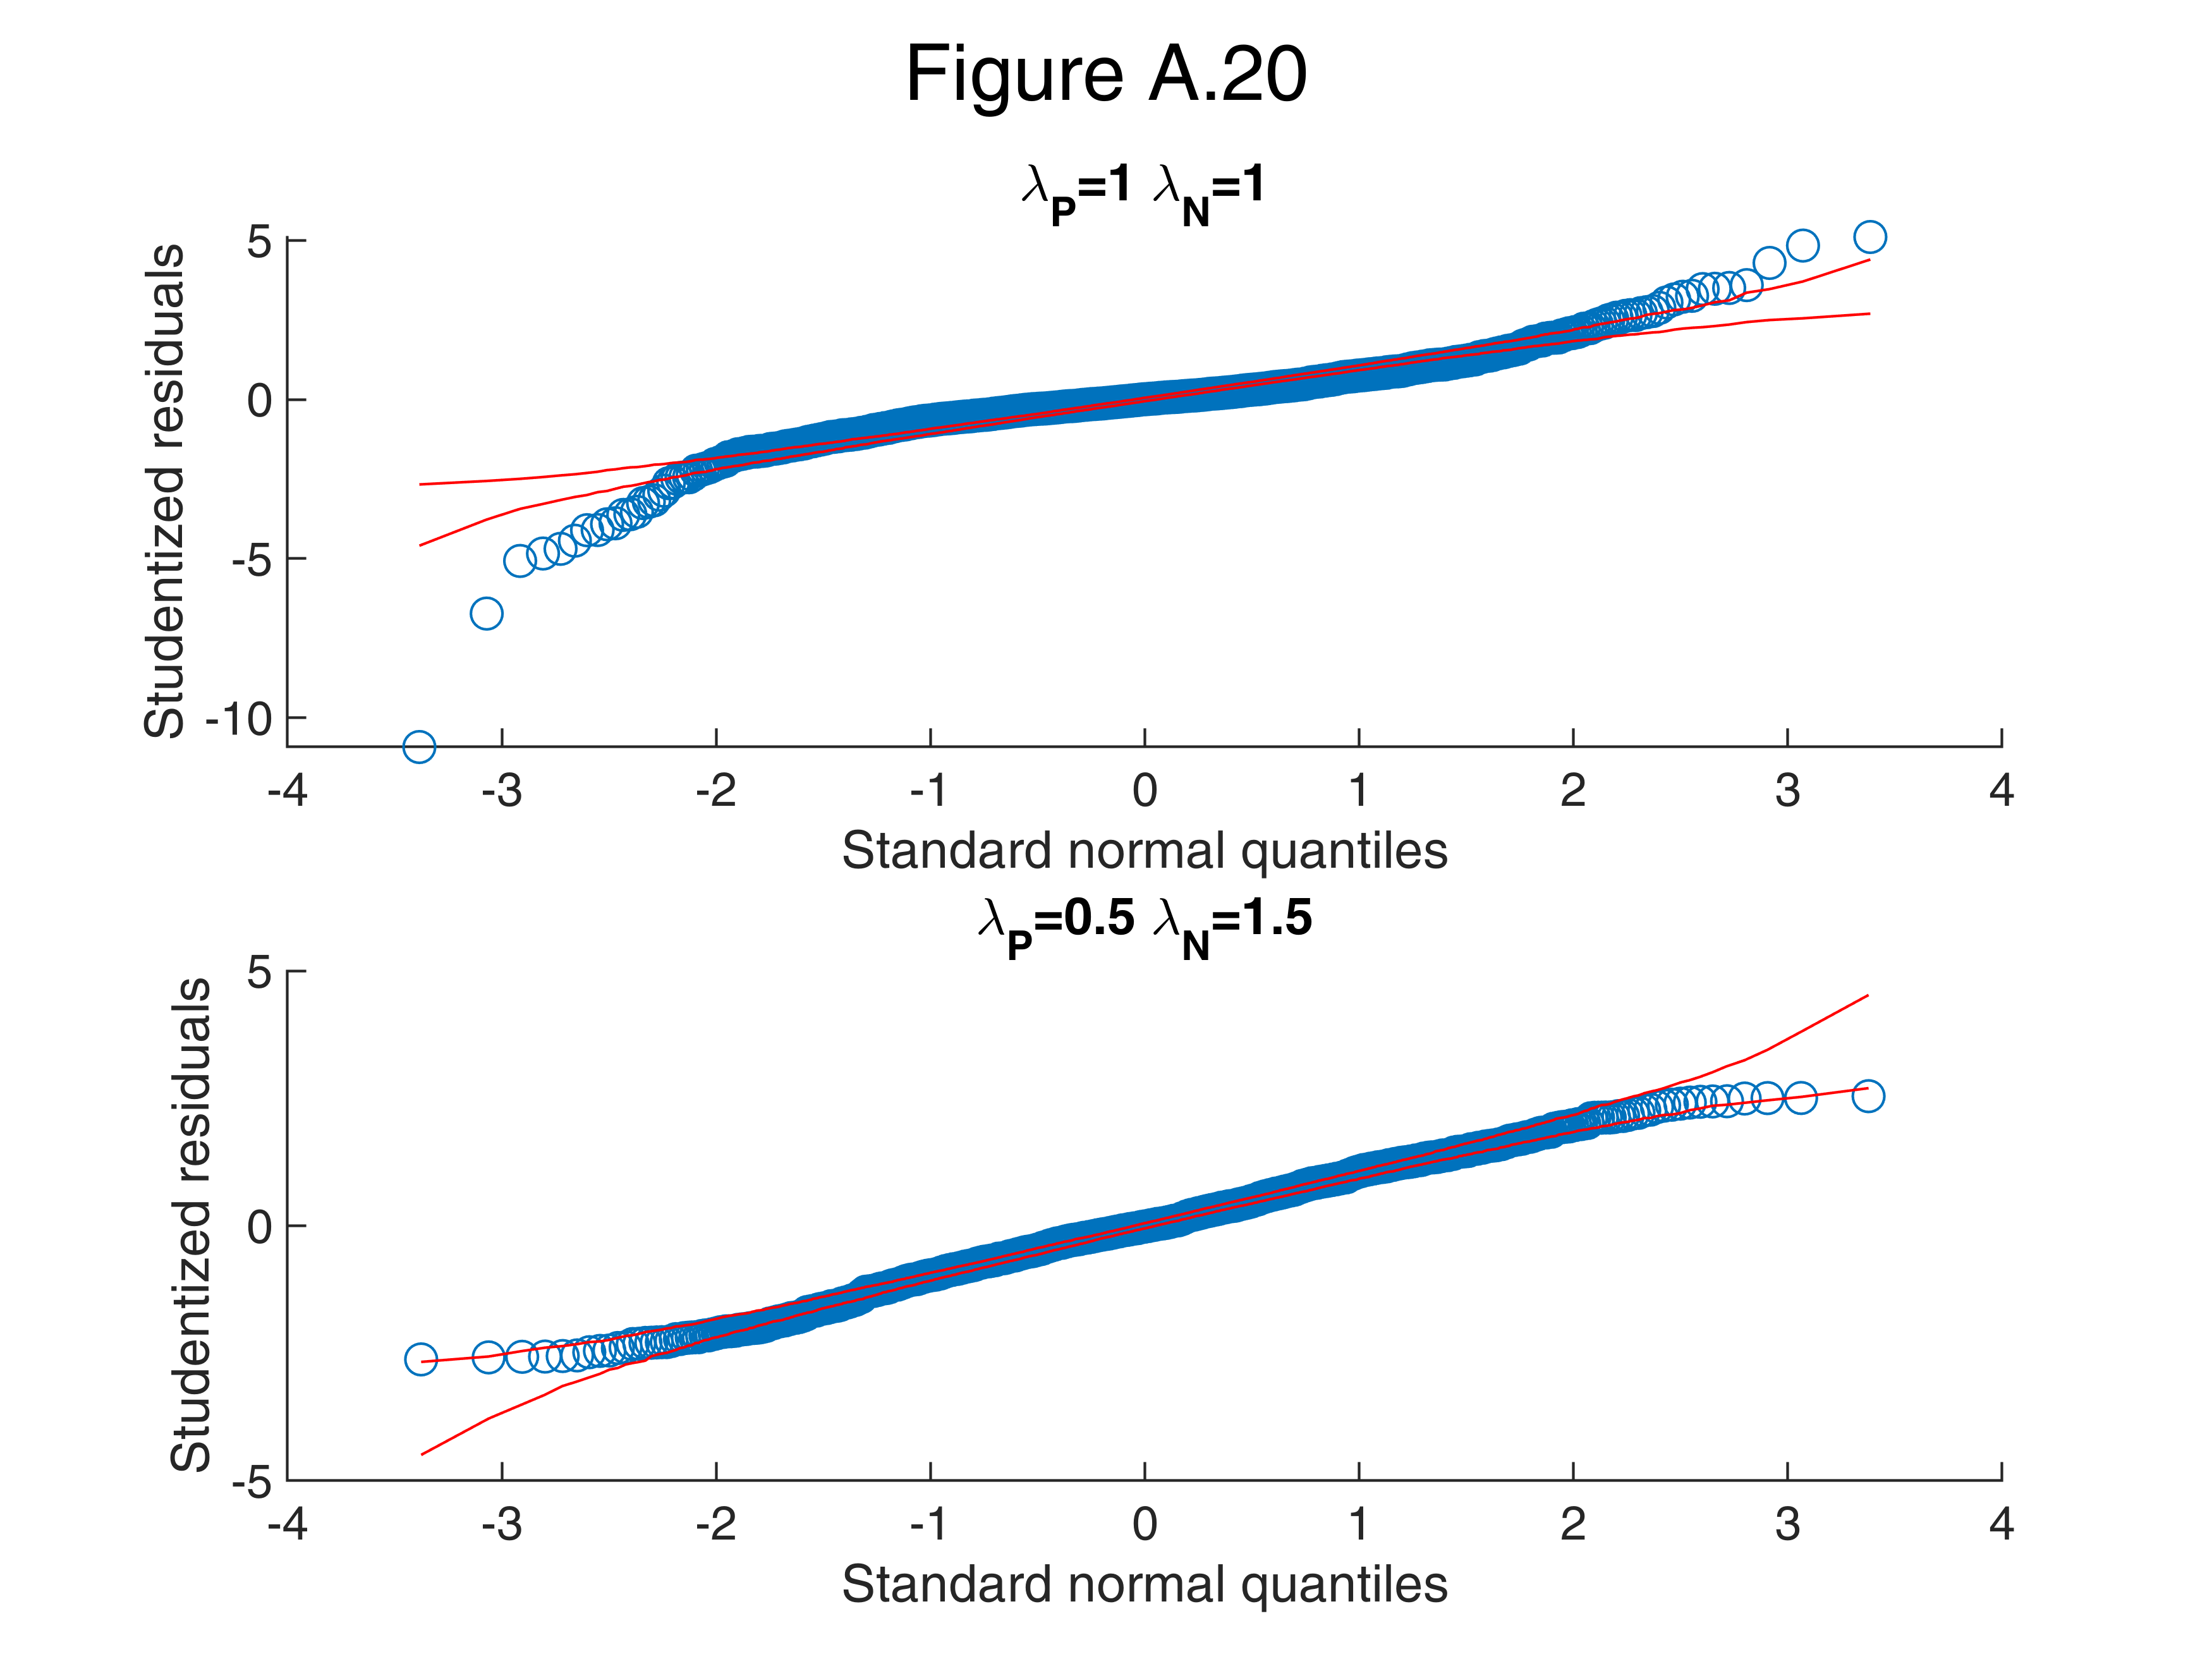

In [7]:
figure
j=1;
nr=2; nc=1;
h1=subplot(nr,nc,j);
mdl=fitlm(X,Y(:,j));
res=mdl.Residuals{:,3};
qqplotFS(res,'X',X,'plots',1,'h',h1,'conflev',0.99);
title(nameX(j))

j=2;
h2=subplot(nr,nc,j);
mdl=fitlm(X,Y(:,j),'Exclude',outf.outliers);

% Plot residuals
good=setdiff(1:n,outf.outliers);
Xg=X(good,:);
yg=Y(good,j);
resg=mdl.Residuals{good,3};
qqplotFS(resg,'X',Xg,'plots',1,'h',h2,'conflev',0.99);
title(nameX(j))

sgtitle('Figure A.20')
set(gcf,"Name",'Figure A.20')

In [8]:

if prin==1
    % print to postscript
    print -depsc BSqqplots.eps;
end

%InsideREADME